# 911 Calls Capstone Project

# Assignment 5
Name : Harsha Singh

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
#The inline option with the %matplotlib magic function
#renders the plot out cell even if show() function of plot object is not called
%matplotlib inline    

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv("911.csv")

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [6]:
df['zip'].value_counts().head(5)            #Top 5 zipcodes

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [7]:
df['twp'].value_counts().head()              #Top 5 townships

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [8]:
df['title'].unique().shape[0]

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [9]:
df['Reason']=df['title'].apply(lambda x: x.split(':')[0])    #Split based on colon

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
 9   Reason     99492 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB


** What is the most common Reason for a 911 call based off of this new column? **

In [11]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

 The most common reason is EMS.

** Now use seaborn to create a countplot of 911 calls by Reason. **

<AxesSubplot:xlabel='Reason', ylabel='count'>

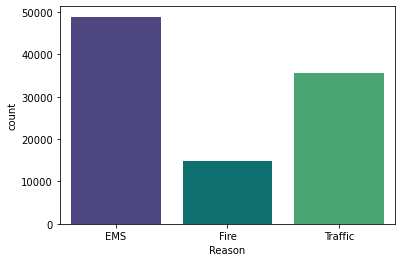

In [12]:
sns.countplot(data=df,x='Reason',palette=['#483D8B','#008080',"#3CB371"])

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [13]:
df['timeStamp'].dtype

dtype('O')

data type of timestamp column is Object type (O) it corresponds to python's string type, we can verify with any value from that column and check it's datatype alone, we get as str -> strings

In [14]:
type(df['timeStamp'].iloc[0])

str

Under Object type the values are composed of strings

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [15]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [16]:
df['timeStamp'].dtype

dtype('<M8[ns]')

In [17]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Hence we have converted timestamp column from objecttype to a datetime object.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
 9   Reason     99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 7.6+ MB


** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [19]:
time = df['timeStamp'].iloc[7]
print(time.hour)
print(time.month)
print(time.day)

17
12
10


In [20]:
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

We have added 3 new columns now

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          86637 non-null  float64       
 4   title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   twp          99449 non-null  object        
 7   addr         98973 non-null  object        
 8   e            99492 non-null  int64         
 9   Reason       99492 non-null  object        
 10  Hour         99492 non-null  int64         
 11  Month        99492 non-null  int64         
 12  Day of Week  99492 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 9.9+ MB


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [22]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [23]:
df['Day of Week'] = df['Day of Week'].apply(lambda int:dmap[int])

In [24]:
df['Day of Week'].head(6)

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
5    Thu
Name: Day of Week, dtype: object

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

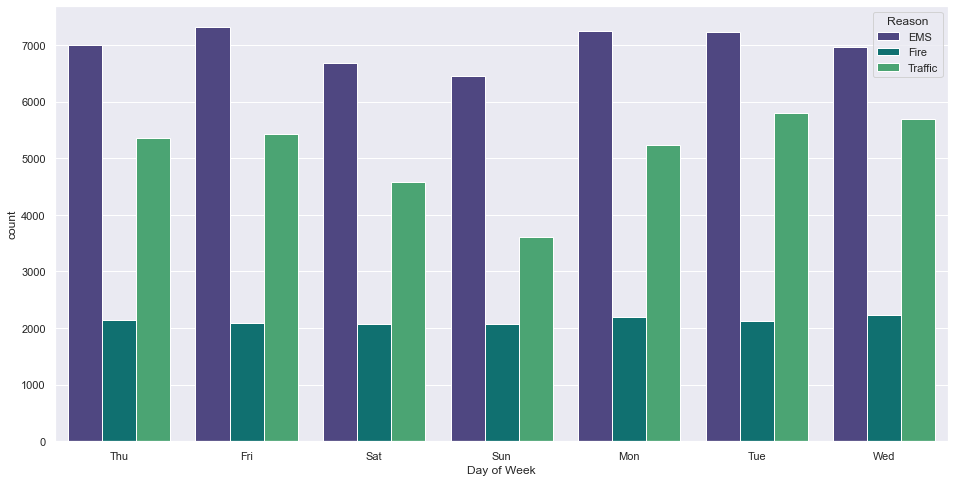

In [25]:
sns.set(rc={'figure.figsize':(16,8)})     #to have bigger fit size
sns.countplot(data=df,x='Day of Week',hue='Reason',palette=['#483D8B','#008080',"#3CB371"])

**Now do the same for Month:**

<AxesSubplot:xlabel='Month', ylabel='count'>

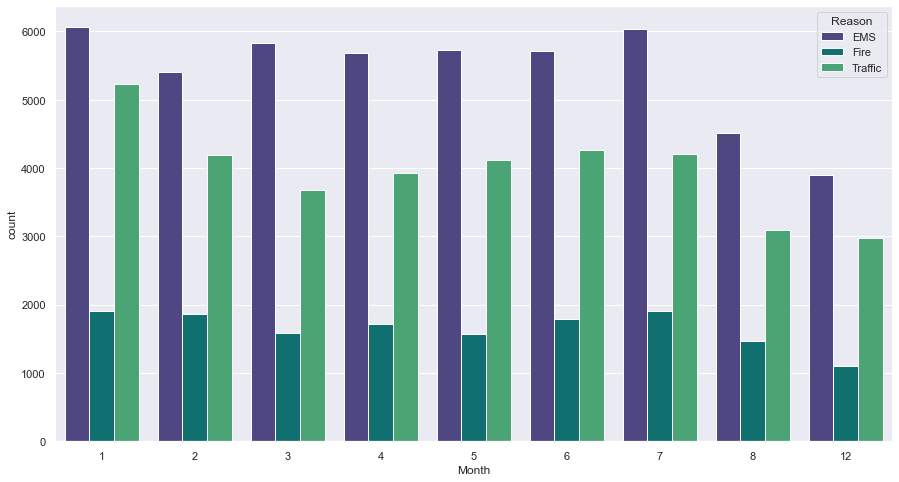

In [26]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(data=df,x='Month',hue='Reason',palette=['#483D8B','#008080',"#3CB371"])

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

Months 9,10 and 11 are missing in the countplot

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [27]:
byMonth=df.groupby('Month').count()               #using month column to grouoby
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

<AxesSubplot:xlabel='Month'>

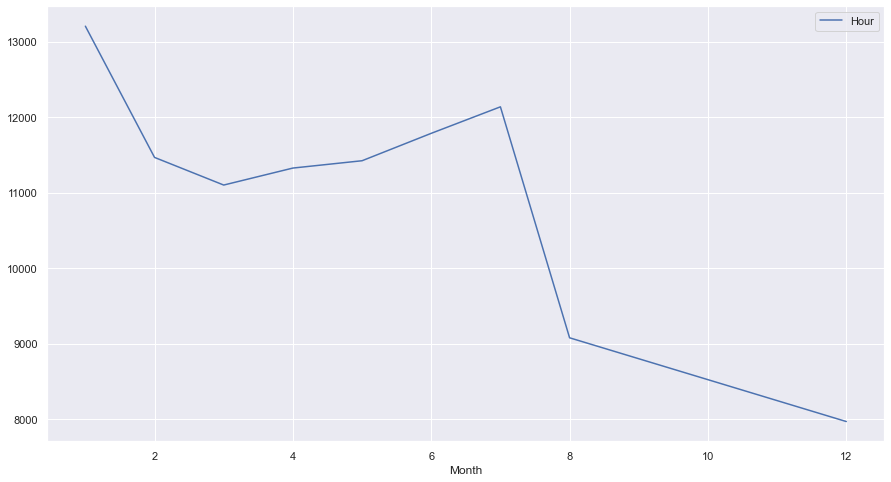

In [28]:
byMonth.plot(y='Hour')          #Using any one column to see count of calls

Highest calls came in January,dropped in august

In [29]:
byMonth = byMonth.reset_index()          #Reset index to make month as a column

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

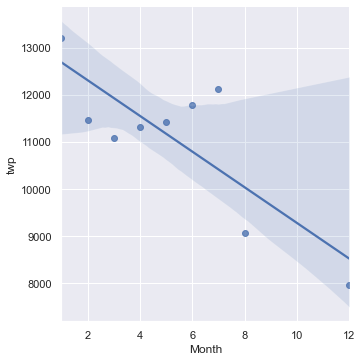

In [30]:
sns.lmplot(data=byMonth,x='Month',y='twp')          #To have a linear line using Month and another feature

Month and twp have strong negative correlation and 3 outliers

In [31]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]    #Resetting 

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [32]:
df['Date'] = df['timeStamp'].apply(lambda time:time.date())         #Date column created

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [33]:
byDate=df.groupby('Date').count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


<AxesSubplot:xlabel='Date'>

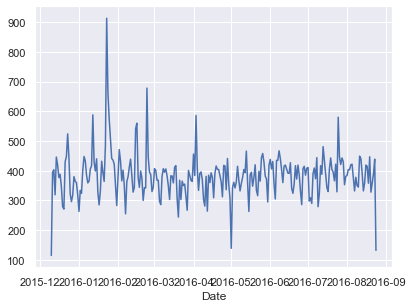

In [34]:
df.groupby('Date').count()['twp'].plot()

In [35]:
df['Reason'].unique()          #Check the unique reasons

array(['EMS', 'Fire', 'Traffic'], dtype=object)

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

Text(0.5, 1.0, 'Reason is EMS')

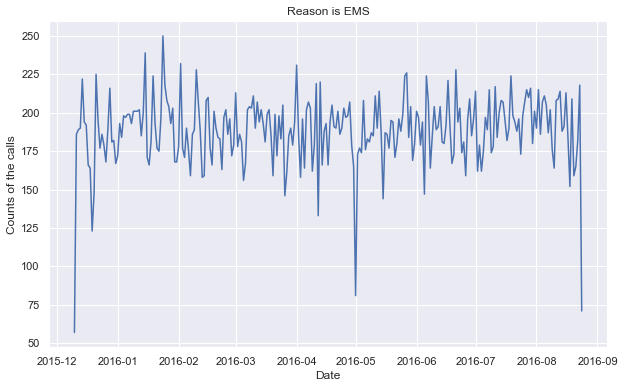

In [36]:
sns.set(rc={'figure.figsize':(10,6)})
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.ylabel("Counts of the calls")
plt.title("Reason is EMS")

Text(0.5, 1.0, 'Reason is Fire')

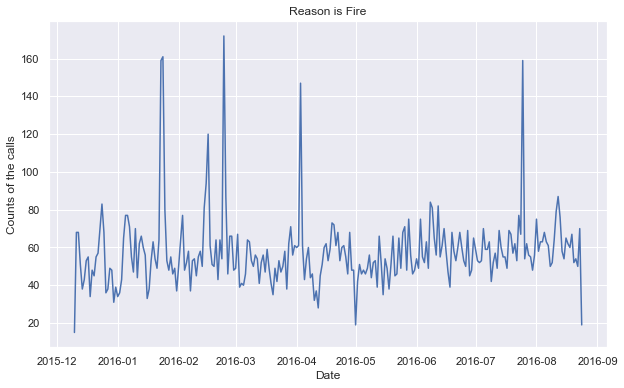

In [37]:
sns.set(rc={'figure.figsize':(10,6)})
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.ylabel("Counts of the calls")
plt.title("Reason is Fire")

Text(0.5, 1.0, 'Reason is Traffic')

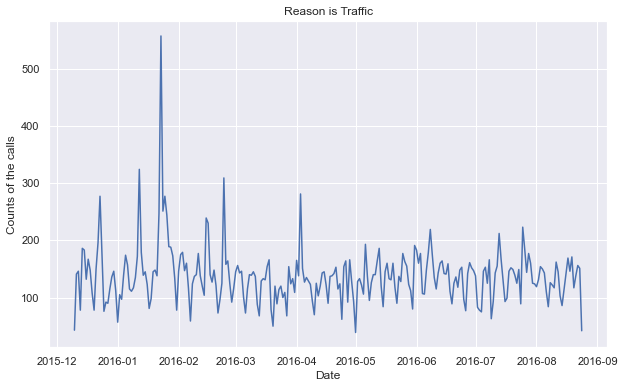

In [38]:
sns.set(rc={'figure.figsize':(10,6)})
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.ylabel("Counts of the calls")
plt.title("Reason is Traffic")

In [39]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [40]:
heat_df = df.groupby(['Day of Week','Hour']).count()['zip'].unstack()        #Based on count doing unstack where the first var is index and second column split 
heat_df = heat_df.loc[dmap.values()]
heat_df

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Mon,243,198,183,173,185,222,338,547,723,690,...,761,776,837,845,762,654,547,444,410,294
Tue,241,214,161,148,184,203,350,563,719,764,...,823,824,868,896,761,666,579,494,411,245
Wed,226,193,169,195,138,224,334,591,770,714,...,787,760,860,881,771,590,597,508,432,294
Thu,251,180,200,144,162,167,293,495,686,733,...,758,828,790,868,707,610,543,472,356,307
Fri,248,200,165,164,184,166,319,526,637,663,...,808,840,897,826,714,616,569,491,445,400
Sat,324,265,226,212,202,205,227,353,416,566,...,677,677,706,649,678,613,550,508,451,402
Sun,336,280,246,228,199,214,251,343,434,554,...,608,588,555,608,574,559,465,419,365,283


** Now create a HeatMap using this new DataFrame. **

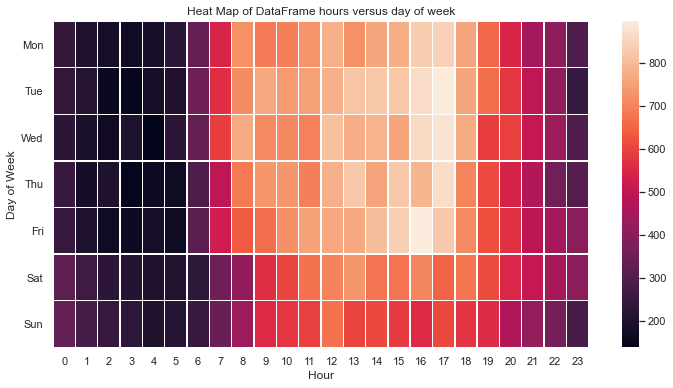

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(heat_df,linewidths=.4)
plt.title("Heat Map of DataFrame hours versus day of week")
plt.yticks(rotation=0)
plt.show()

Highest calls are mostly in afternoon till early evening, morning and midnight hours had the least, and weekends also had least calls comparitively

** Now create a clustermap using this DataFrame. **

<Figure size 432x432 with 0 Axes>

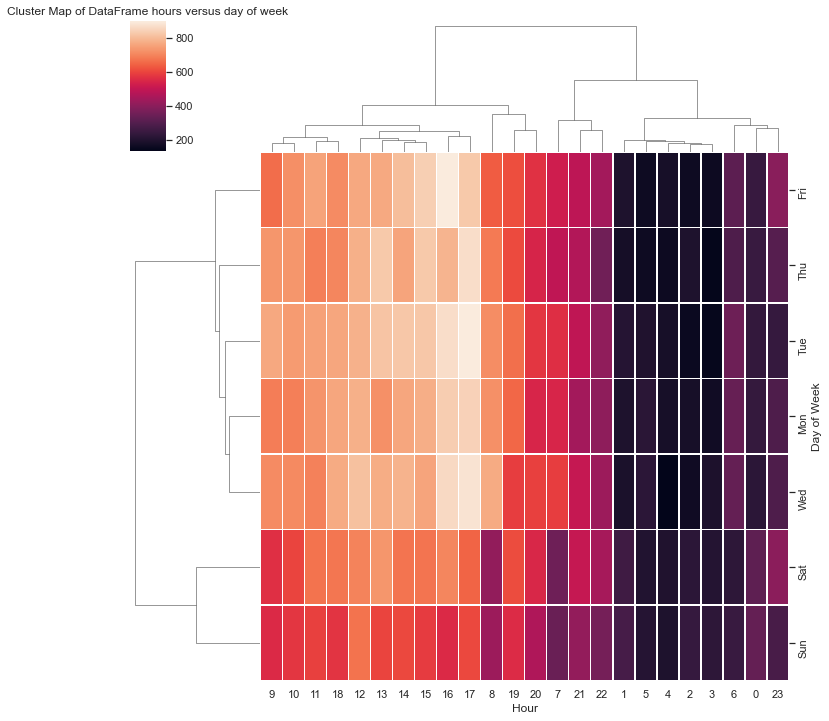

In [42]:
plt.figure(figsize=(6,6))
sns.clustermap(heat_df,linewidths=.4)
plt.title("Cluster Map of DataFrame hours versus day of week")
plt.show()

Mon-Thu form part of a cluster with homogenity depicted in the hours 1am , 2am and 3am.
0 and 23 also form a part,club with 6 and merge with above ones to be in lower range of homogenous values
Similarly [9,10,11,18],[12,13,14,15],[16,17], together form one group
and the rest of values mostly in mid range form another cluster

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [43]:
heat_df = df.groupby(['Day of Week','Month']).count()['zip'].unstack()
heat_df = heat_df.loc[dmap.values()]
heat_df

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Mon,1506,1658,1364,1401,1547,1397,1473,1316,1101
Tue,1699,1535,1647,1255,1660,1453,1451,1415,1092
Wed,1483,1684,1680,1348,1350,1794,1504,1106,1081
Thu,1387,1392,1648,1391,1387,1800,1447,1038,1090
Fri,1736,1362,1332,1684,1504,1429,1811,1123,906
Sat,1987,1240,1110,1512,1265,1203,1507,956,832
Sun,1729,1059,974,1304,1233,1136,1440,878,805


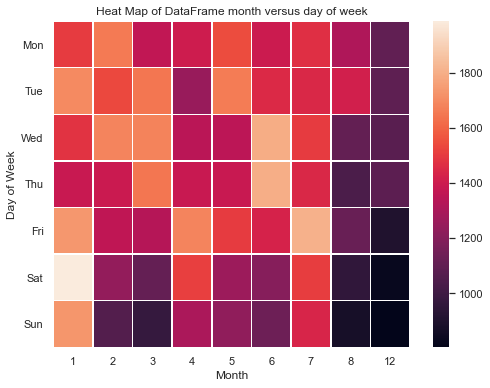

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(heat_df,linewidths=.5)
plt.title("Heat Map of DataFrame month versus day of week")
plt.yticks(rotation=0)
plt.show()

We can see the highest number of calls in January month's Saturdays

<Figure size 432x432 with 0 Axes>

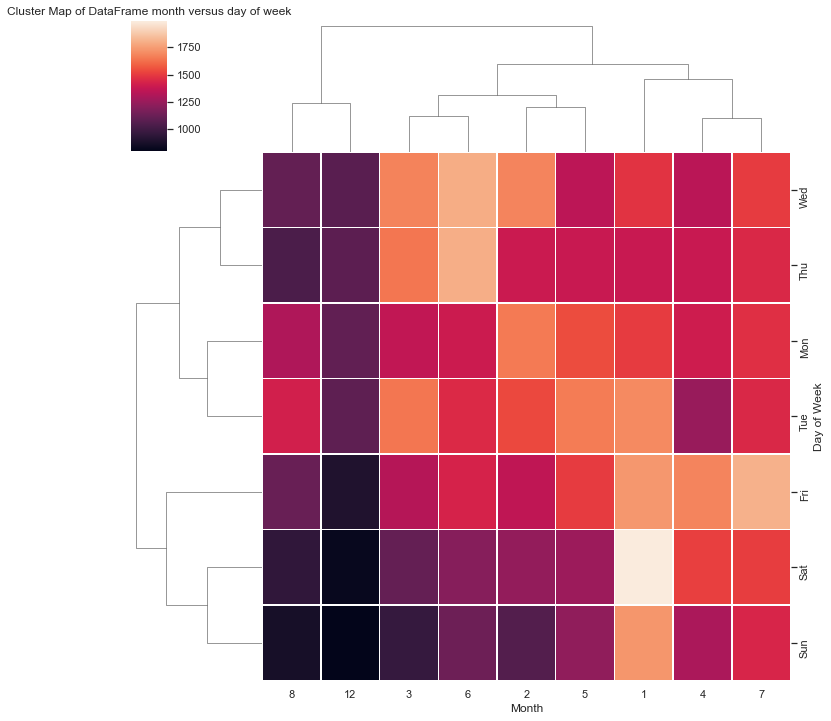

In [45]:
plt.figure(figsize=(6,6))
sns.clustermap(heat_df,linewidths=.5)
plt.title("Cluster Map of DataFrame month versus day of week")
plt.show()

Mon- thu and Fri-Sun form one cluster,
August and December form one group
Months 9-11 (Sept - Nov) don't have any calls
Rest of the months (1-7) form another part of the cluster

<AxesSubplot:xlabel='Month', ylabel='count'>

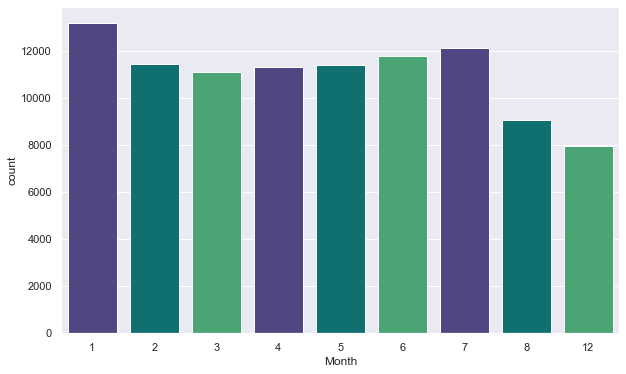

In [46]:
sns.countplot(data=df,x='Month',palette=['#483D8B','#008080',"#3CB371"])

We can verify in above plot, that indeed 9,10,11 don't have any calls

**Continue exploring the Data however you see fit!**
# Great Job!